# Exercise 4
In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [102]:
## what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import LinearConstraint, Bounds
import quadrotor

In [103]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [104]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6,1))
u = np.random.rand(2,300)

quadrotor.animate_robot(x0, u, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAgum1kYXQAAAKhBgX//53cRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4IGxvb2thaGVhZF90aHJlYWRz
PTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j
b21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0
PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu
dD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo
ZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9
NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAERxliIQAEP/+94G/MstfIrrJ
cfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsADpCNT/0/dhJIzAJyZMhQHovEG
Sv/F3w0ijovPgSEF+f8XyAhQngyn0F6IKd/RkqYKmtWPIQQkVHrqC7e94783CsYraD/MDtWVf9fL
4FPGCyUIb/yIw70driWO22rSgsQN+97GElKO+ZSLYfvTeMkY9E337krU8FB+eRw0/MLPNBvKuolu
b1HTfuTez63BbnI6+oG6CfTlrmXe+EpEyrMhihCWZLQQLOn+y3lGGnlN+dxkrvqSVT0E3MqZub8n
EHVENNE/ib7AFnJ8bCFFu646akmpbJKTKfHxS9Nu4BJI0kjRq6Sd9d/OAWMzxqtoFoiiOfHE5s2q
lTV2WzkrDUBmImAN+qWXrePOdxj2DMfe4naB/U3Grnr+0USAYDq/+7rNq6RF+6lgFsXXiFuAAABr
gU3ssjSb8ZFQ/UU8XY4fx40+mmkalPndKgqcajrWA/T04URs6okFP6J1i3OyHhat5Q0CjZfsUBOX
xJqOsMy/jiCJSWudXZI8Jy2TXTzhI9Q1AuRbh4xCJ6u3/sYFXmM/d/Um/pFJ5IH5/XCw/bQx8dRD
K48mPc4CVLvoAozY8znoEgcKQ0j5aXzIliVJ0t9A1uZGusE0uVCKz3z1CW29q0sgpMcM/sWPuWxG
bK5xnTmEdq84RA+XYw03X+ub07rOQvY7q6te3+nmMtwqFeri7YbuhCvGuIpKwBwTpmP/KVvkF+Gw
+031EBaifc8Z9zjiO+Ha0xJm1nCDxf3vgZmTgKxz9tzaBL3SbftAXZdMKWNHkSt/PHguBzYQw42p
VAxVULcE8/E3PyLdeXQRBk8LU9vSSjQ3/GHGJqJu3JGxZS/R/+PQxWv87gyVAQ7nOAQzIsanmjco
BrLP0qmefCDhBvCxXfoZfFaGnjNXr8E6bmPtuWnIGbWR1BAOM5PdA2tPRF83kmHXkYUXE1jWrPAI
Un0iujG7nolnpHeycJTYF88P3C9ub4W275X7wvenHqKgnL3X/sTw7Gms8VQCgYFDCY953lI1316X
rBfrHypzlk2y1FuTak48Ky8P8uxYOgJ4aF1DGfJYnBogAAD+kwhfMZaS9zqWmbGcVnYOGAe6xXem
+F3L8dTRLA8KxPYnjKc10+zVs0za+996jCuewHFupEuWY+aYcNtrPIOnP4AXA8cPE9ZFekUnBTCU
vT7E8MJ3Ac+pdCverUr65hH6dFHlojJWBzon7/Jk9QZAtz5dGbvB4oDV0AyP/FeOhpKBS8oMNiGD
Qf+wa6EMiMLzgOB55ylNmlFT9w5jCgl4L5y9HY942zXQKeLWLzKDo48qPfdgOGFwdpPIf/vY7e7Q
m0x4O6bYsVQxcCazW/VUwZGy68wm5EsW7M2BLbnKn16Cj6IrLMX5dKjfU9rrJg6T1u1H95ndVOGc
fziOH7Sny5c/UVOgYwvvx1QbOYu2CXzT5Euz10dxTbsDIeEmtbQ7obtt9647lqsjm1JbmlinxfnJ
Xf9TpvIxZiO7nqz7frihNGiIj0JkYEhuAQqw220OBDf8/EQGnBK6zYN/vYebIvXzyV3x6mp+pFIv
miDy7wJNArdbyoUR/CQhc3NMwM2Ws10YsvXC/TnLEouKjJUt7591kkzz0gsVPSJpePL9Fq0P+LLL
755hWsq/iiZOCGp8kZYvHx//pYEwX3mSfXoazblJ+5FbnoVy1FWF8OZUqf9+eTLPboKUIeE7K8d7
VLdc21mWW6tztSlMbEES629ST73cIC0OoScI6sVZlINGdAPs0JaFf0lZsltOGN2ug139mzjtEzpv
4X7esmNOHC6Z5zBGhdx/CnsvUjWQyilo5UPW9FqSqYv1b0f0CXjdjLNGKRv/64WZJQgR44SKJO1v
KDlz5Q2pIB6BkEmdCn3Y/mUQ0yheICrIfKXBwOHyzRZodgAMqTX5oW/0ECr7/co8QarAAABFOTQ8
/dFXIgOzgLJB22WYOYcH8qzK1PNf1aJs32M4Glt/HxUlP0oqXPqTc/+9i4RbCUCigFYhiCNr6kWH
7yubcm7KZ+PGdyLO3SQKPgMGfo9ZfUHVB4vr4Q6AiVwT62qbPocgpZTx/UrbIYRoup964KFXPo9h
sOPaPh24Yw2eeujr9+E/y+EfM0jq4cuHhIPlYw/URGWt7iCer55kEahesm4ZVTrZJBocw6ToHPPl
bn/TZFE31ULdMtT9I7prEOFeoAlPojAdSpTfF04oOaYVEjJtJQ81iWJgX47M6wVCkzR7EyNXZwh9
wwKynHfE0pAg6gSDUPc8N/ZnFxNGwqDMa9/vewfPmtPwRuzD6pDV/klLbcYBAyhC0hKl4sNiq7NJ
wYcv/q67ooMJwRr9feFIVOshtrIhuauHbZE2LLzPcc5GDO4HXCQSmzMD9En0uySpczIhz+cA5tCc
1RIs4JpNt0ZU9WRDZ1cn47a4Uf9L3LYdbGZMR0HQetAcC3R8nJ2IDwj3aGlwRrcIXbuQ0lhRwk5i
BvSHwk0tSzcTHEqnE10x5dRG4VTm+NYAKTZ66LaaQNtDsW2aNA3eTuTKEyRl/aF/NswH6/2rgfLL
d+CUWc6iRIpFDG4D4GGulv+vWmts2r6JJ6+Dq9W4shhW/s6UKLJU1oA/g05MIJeW45cHV/lm9CW/
rGVSbgNZ8jRUWSxDlJyZwZElvROIFSlLMl7VlQ/p9ahMScDUigjIkyFbVhPHC1NLlVR87Y4/SOvv
VmP5B72BxZLeL/xnO7G7iXw5Xwez6bPu8g89j/s1AZk7lnmpqjM0iE+bZRFsG2I5SanmiyZJCKg4
96XScP6FsoAAKgk4IDGj6NOnFoajDAAA5U4mHWt1UGSTCpxUEylT3SdnfhYJWAEtv88jPM2TAn7x
jyJuZOciXWyWH5tBFfb4T

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

Soln1 <br>
KKT conditions <br>
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$

can be expressed as <br>
$$\begin{align}
&\min_y \frac{1}{2}y^TGy\\
\textrm{subject to}\ \ & Cy=d
\end{align}$$

The Lagrangian is given by
$$
L(y,\lambda)=\frac{1}{2}y^TGY+\lambda^T(Cy-d)
$$
As long a $G\ge0$, the problem is convex (convex domain and convex function to minimize) and
therefore the solution to the KKT system is guaranteed to be a minimum.<br>
Then KKT conditions are
$$\begin{align}
& \nabla_x=Gy+C^T\lambda \\    
& \nabla_\lambda=Cy-d
\end{align}
$$ WHY??

or equivalently
$$
\begin{bmatrix}
G & C^T \\
C & 0
\end{bmatrix}
\begin{pmatrix}
y \\
\lambda
\end{pmatrix}
=
\begin{pmatrix}
0 \\
d
\end{pmatrix}
$$


In [120]:
## write down your code here

# we define a few constants
xdim = 6 # dimension of the state (x,x_dot, y, y_dot, theta, theta_dot)
udim = 2 # dimension of the control (u1, u2)
N = 500 # number of steps
nvars = N*udim + (N+1)*xdim # total number of variables
x_init = np.zeros(xdim) # initial position of the car
x_des = np.array([3,0,3,0,0,0]) # final position of the car
initial_guess = np.zeros((nvars))

## We define the cost
x_pos_penalty = 10
x_dot_pos_penalty = 1
y_pos_penalty = 10
y_dot_pos_penalty = 1
theta_penalty = 10
theta_dot_penalty = 1

Q = np.eye(xdim)
Q[0,0] = x_pos_penalty
Q[1,1] = x_dot_pos_penalty
Q[2,2] = y_pos_penalty
Q[3,3] = y_dot_pos_penalty
Q[4,4] = theta_penalty
Q[5,5] = theta_dot_penalty

R = np.eye(udim) * 0.0001

def get_cost_matrix_G(Q, R):
    '''
    we are making this a function so we can reuse this later in the next cells when we play with costs
    '''
    G = np.zeros((nvars, nvars))
    for i in range(N):
        G[i*(xdim+udim):i*(xdim+udim)+xdim,i*(xdim+udim):i*(xdim+udim)+xdim] = Q
        G[i*(xdim+udim)+xdim:i*(xdim+udim)+xdim+udim, i*(xdim+udim)+xdim:i*(xdim+udim)+xdim+udim] = R
    G[N*(xdim+udim):N*(xdim+udim)+xdim,N*(xdim+udim):N*(xdim+udim)+xdim] = Q
    return G
G = get_cost_matrix_G(Q,R)

##### CREATE THE KKT SYSTEM #####
## create the linear equality constraint

C = np.zeros([xdim * (N+1), nvars])
d = np.zeros([xdim * (N+1)])
A = quadrotor.A
B = quadrotor.B

# Initial Conditions
C[0:xdim,0:xdim] =np.eye(xdim)
d[0:xdim]=x_init

# Dynamics constraints
for i in range(N):
    # xn
    C[(i+1)*xdim:(i+2)*xdim, i*(xdim+udim):(i)*(xdim+udim)+xdim] = A
    #u
    C[(i+1)*xdim:(i+2)*xdim, i*(xdim+udim)+xdim:(i+1)*(xdim+udim)] = B
    #x n+1
    C[(i+1)*xdim:(i+2)*xdim, (i+1)*(xdim+udim):(i+1)*(xdim+udim)+xdim] = -np.eye(xdim)
    

# Desired final state
C[-xdim:, -xdim:] = np.eye(xdim)
d[-xdim::]=x_des

g = np.zeros((nvars))
for i in range(N):
    g[i*(xdim+udim):i*(xdim+udim)+xdim] = -x_des @ Q



## create the KKT matrix
nconstraints = C.shape[0]
KKT = np.zeros((nvars+nconstraints, nvars+nconstraints))

KKT[0:nvars, 0:nvars] = G
KKT[nvars:, 0:nvars] = C
KKT[0:nvars, nvars:] = C.T

f = np.zeros((nvars+nconstraints,1))
f[0:nvars,0] = -g
f[nvars:,0] = d

##### SOLVE THE KKT SYSTEM #####
x = np.linalg.solve(KKT, f)

### read the answers back to p,v,u
x_position = x[0:nvars:(xdim+udim)]
x_velocity = x[1:nvars:(xdim+udim)]
y_position = x[2:nvars:(xdim+udim)]
y_velocity = x[3:nvars:(xdim+udim)]
theta = x[4:nvars:(xdim+udim)]
theta_dot = x[5:nvars:(xdim+udim)]


u1 = x[6:nvars:(xdim+udim)]
u2 = x[7:nvars:(xdim+udim)]
u = np.concatenate((u1,u2), axis=1).T


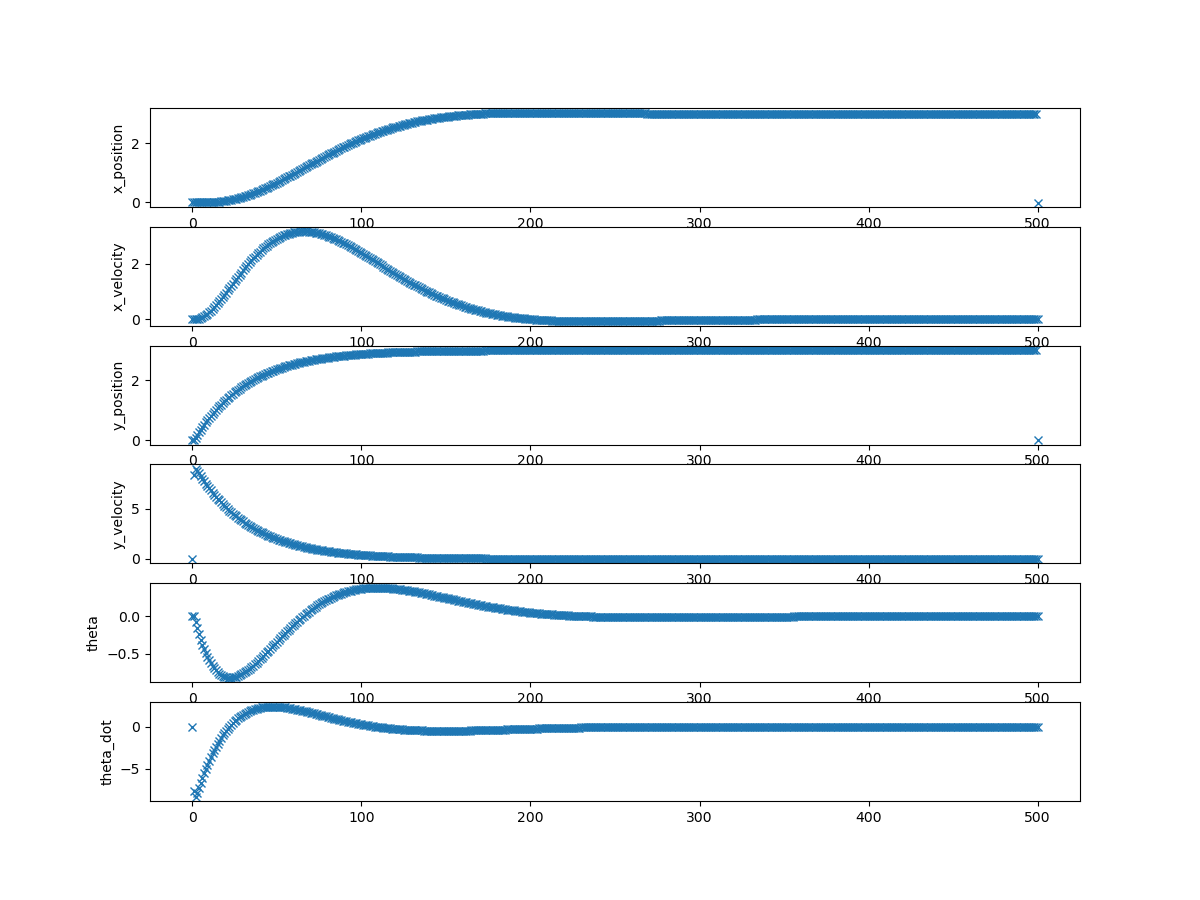

In [121]:
plt.figure(figsize=[12,9])
plt.subplot(6,1,1)
plt.ylabel('x_position')
plt.plot(x_position, 'x')

plt.subplot(6,1,2)
plt.ylabel('x_velocity')
plt.plot(x_velocity, 'x')

plt.subplot(6,1,3)
plt.ylabel('y_position')
plt.plot(y_position, 'x')

plt.subplot(6,1,4)
plt.plot(y_velocity, 'x')
plt.ylabel('y_velocity')

plt.subplot(6,1,5)
plt.ylabel('theta')
plt.plot(theta, 'x')

plt.subplot(6,1,6)
plt.ylabel('theta_dot')
plt.plot(theta_dot, 'x')


In [122]:
quadrotor.animate_robot(x0, u, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAtzm1kYXQAAAKhBgX//53cRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4IGxvb2thaGVhZF90aHJlYWRz
PTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j
b21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0
PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu
dD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo
ZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9
NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAEWtliIQAEP/+94G/MstfIrrJ
cfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsADpCNT/0/deNpxANBL7R6l87Lm
plBSGUsMQgNinSvYBoi8EPlGhxil7rIakrntmRfU0qiM0BAfkrs+j5GFt2itzqQrfd3lpmJFXa+M
NDKxweBUJBLIU/3nnkAFuR+wSGS1R3baEJNmkJtv9QkKzPL1D8geRrUHH6iEMmPeZXqEU9N+wdZ3
pbWsr3CmKqMPW6QAPuubbXHn7oeRPpcbdx2PEb3Pjv0LQIvWJTS6Yshbxb/waOsmEtAuFYiPugmH
D0Uc6dBSOZpxtrApYbKI8CPKIfy/TrX2bfrUpKk78OMQiJWne4uXPAUK8GnhcMeF6Gw3fFrnk1bH
kuLelOlsXb4/uxxRW6JvbaMRIy1e0qv4CgsjqUzEsux/iduhZZ/6eFfXjd2zklYZ4hruvotgDGod
wsgNte3KWPYv74ZHeAg6TY6pmP3vifXycAASt5ljd3W6M2UEAA2c7wG47vQsSFs/oZgZ46TVaarA
t0iAz1mLs9C1lnALDNbnx88oNoxG3oy5qOCp7P6IBUApX/U5PrmH5ztclGbk2KDmBqTz5yb7dW5o
ZQ2qc33wty9nuP5ix0JzctHWPLIqfdt6qRwlSX+hpvldjYCLxLvuDp8yAQjhvosoS8qzINvsVvFR
IPtn+IEH4z9eeleSEnc+/xBIVw9TqzkBskpFyTqMdwKujx6vy0mnh1WncMGKXWSw7v5w9npWkC+8
NXnX2sr0LlsDLy07dzXWKN/UDk7Jr/YgxwPpEP9cf1BH1lwtFP/+hcFfPBo67z8Dm99J15q/bUes
EE+bkvQExE/aLued9Fid7ZzFU2Xjo/8oNhK8WQ6iW3IeIeV8JX7VJpYvIOeh+JN9/M9/2kP/fJfG
3p/JODX+wyEnCKgJiqnganfvOkbzzrvzWPjgyri+cUbmJkOxl2jZjO1QPKExwNQmk54LXjhY5mvg
saC50GMDOFxNWyiX/OE+t+cZH60/7XytwioDC7EedFpK/JCBN/7z17gZTEUJTjh+yFQnzbuyCPu9
1Ngt02XNUBX8S/M6OS17pc+/YgAACiSavv/1bpRpLkaRgqEADLmNDDvrYMf0Lc8QLRaqKarsFGnH
KP5omwLdNdfawzHPwaGtwwFxKGorCqFP1CYRwoIeGGWk8U8FlR9nbItJUnOlo0Qh7o1x7NxXyhml
pLmCY5q1ey2OzSuyyoZOU1TM8zWY7s5m/7+h3mq8oZbu8vxSZZgv5Q8R9L1tbl45xiluxg5Jz6cS
mCyvFhEuZ5iLSTSDm2r3zaro9n+kA8bi06//WBbp6IJwkhZCgONGHdZz64jv3/eD7l4pknYBlp9j
Ca6R9QnEqJlztx7OnwfvVkdSSR9BoltWhBSJvcBHnInnw73MiBDme18eDURf2fE1ahkajznbDsgb
Zq3G6aDsJWKmUC4KbW3g67YDoscFUSXm3hXnIJqXCzeHhWHBTS+JYGrIVwasRsK3Pf6SkwuxbxvI
EBHQjG+P29+Rjiacd84TqV68PCX2IssYJAAAMhmCDUwkEG07AAADAzdMtZP/DB+EnRiVqgJeD+br
9EALie1ydtkNZkhzgYXKOs+NCqY10ONcWeQCjyN+84smWlrlCglkBOV9iJZ9EgsXSMNR6g7WwodF
9eucFLsjYstk1Df8cD7TmJgXU0ayA/L9fmXg7C7zKMfkkyGEZeTwUyf0r2IUhVkot1jU5Q+0oarc
UBxHAa2mlTBhfmBakvSJuHNVKhXOa47dSKH5Cqh356hxd4a+G+XEnT5oM76+vkWsMEPCoH4ghzrB
XE/hTG/c3GVoKkhSe4D4Z//rmxMEQ7bCmSJA8XYQqwjTNsRLhauOB6143Ym/84POkuASOjgAP/5A
V/YLz+W4oDMJXpbfSARMFEaTIpDFrAAAD/QEYPgZHF1kmgcgvAfbKjPmi+uwjSCXMlyfpsXg5cLP
mOQDZJWwLc5YtBgVC/ofE34BbLunoCXGLvaIOrc9EnoOX4ZXeVXjT7zIwj5tE6H3CxKZYt3eW66u
LurcYPakweQU8xDCRqHSs2hbFKV3//NLFSYzcWwEKJHo2diYHEpSYQ1P3DMawp7XNdy7iXYB1a7b
XPheBekvuIiGyHHKeqcT156NdjDovZImmiAyhH4WCRzj1laiO2jTfRP8Bj08VJhH/wPM1Z2KVc//
ypZZWtYynYQD5nkZvckJOoXLcbd6f/rt/od5F6uKfNNTPYtrwbQT2+99TpiIvFfysDBn5pONoLGZ
//sELzT4WW4opuw9BlpmrNq9e8EhpbdgvcBkCcW0Hz5JqTfyLazvJUF5Gk7yd0iF27QjPC+3iWTq
nBaIPiD9KHfgfFFZdzyctQpbbDR7Fr8Uo/TfOCi/U2USQuJ/PWb2D5V+ig38DP6foNB41584a6Co
gE5sJ1hA1gzAclC9rOf5+CNqyX2y4Slc+s9Dgl6DpRpWLmDB4KRvQu/U18Wr/D4ATwAjITl3VUjw
JVZmDaKY6OawYI8GQ2My8GRtolcYv1145MLX5sMukrkRaIe23nCLHpuxJaJdU59xLKB3iNCE2p+y
6tCWsj6E1Wqt7sl54vTYcDigNEbymPxqs/d4vNSJFabFGdp732AyUTxyfDRzxEOtrl/f97VhFyZB
K7mCTuwq8Hb/OF6Msu7Hz2gwSXHFVJeopN5XsNmxtnWLjwCG4MADSln/+1Epk9TfamcjqD+/67R3
XLNiIU1AtAYHC8SQ0xzHs7MQCXYSmSSnIcJ8QPumjycAGAjcPTLGVvYLAA0dOTzHmY52RnYd72/s
wIQorIGLAAGVEPybye4bKjo+YtieLsAADNj6KjCJUtVPNUldiKzgKbx4gwTrB34QTsml35636pkW
uqzuvjrlIxQsDlliUw0JN